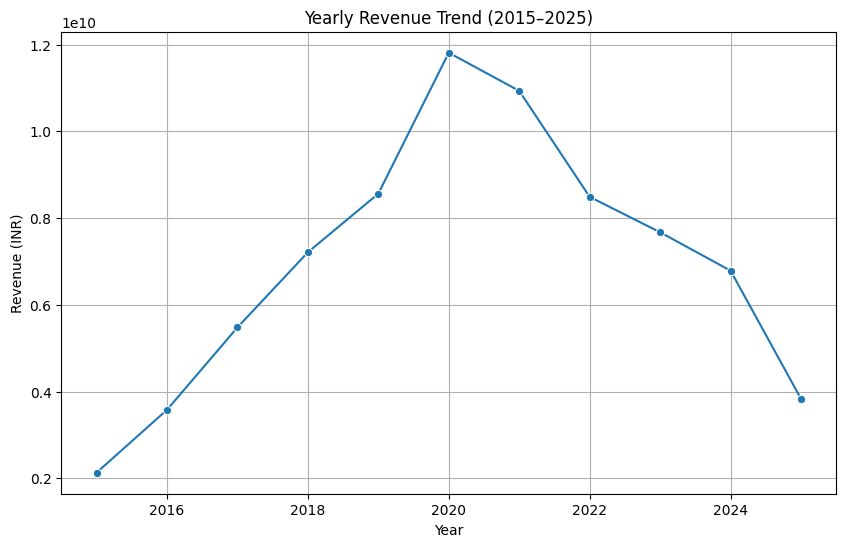

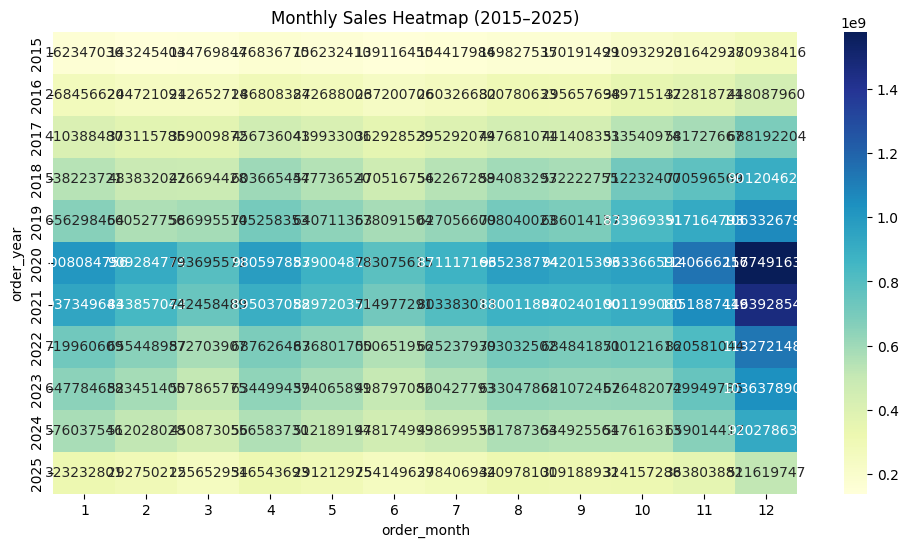

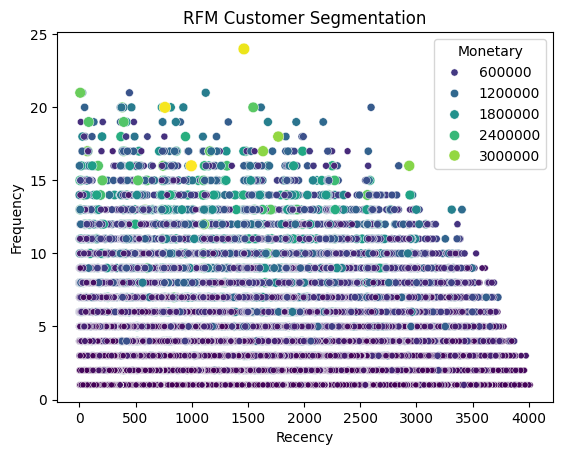

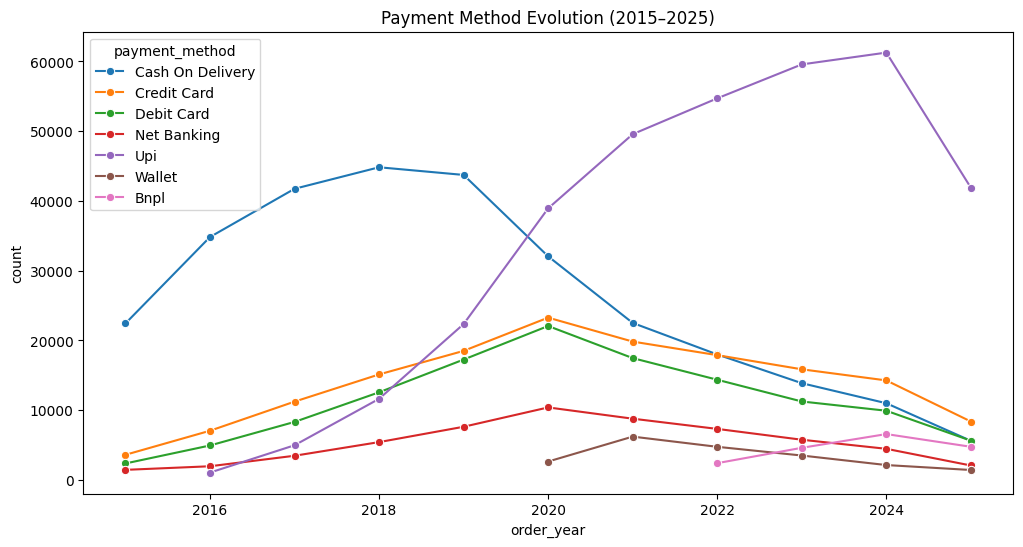

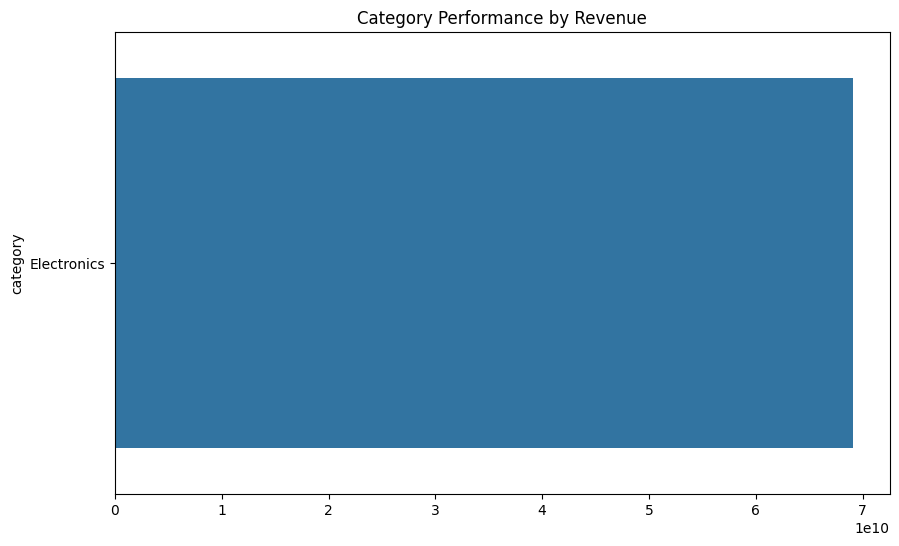

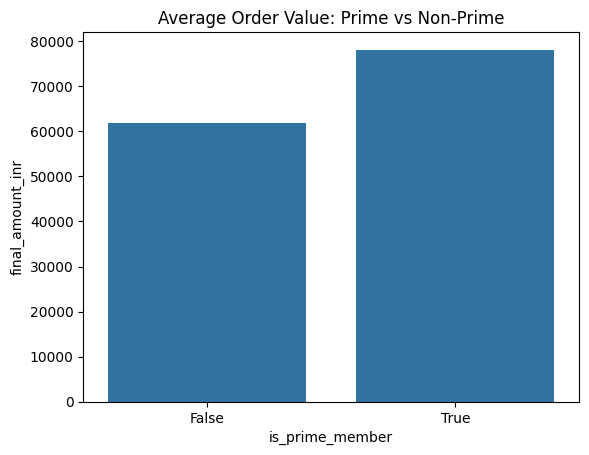

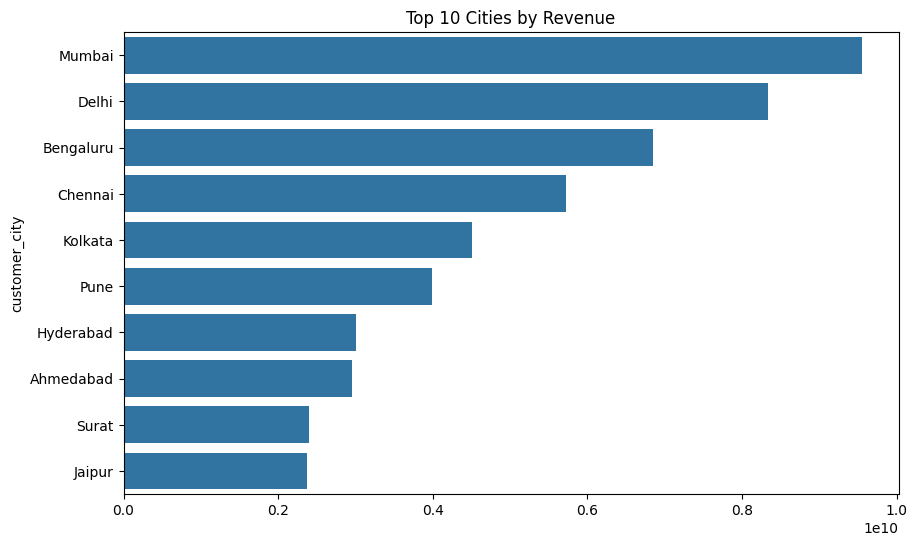

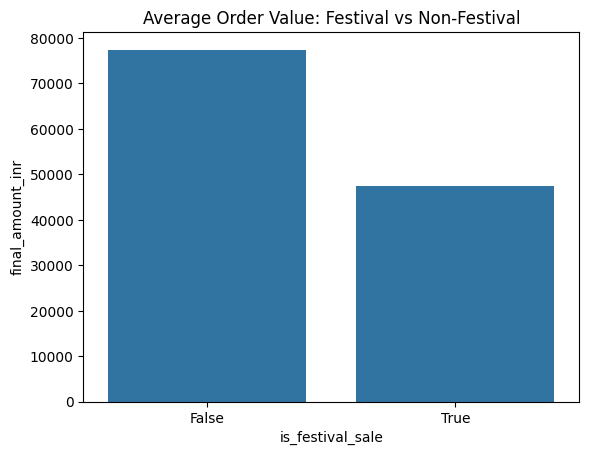

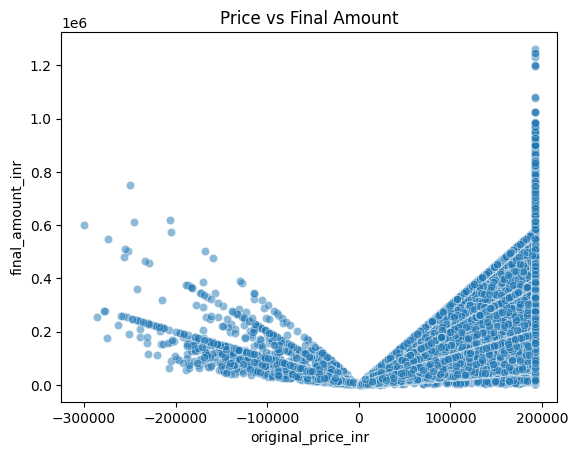

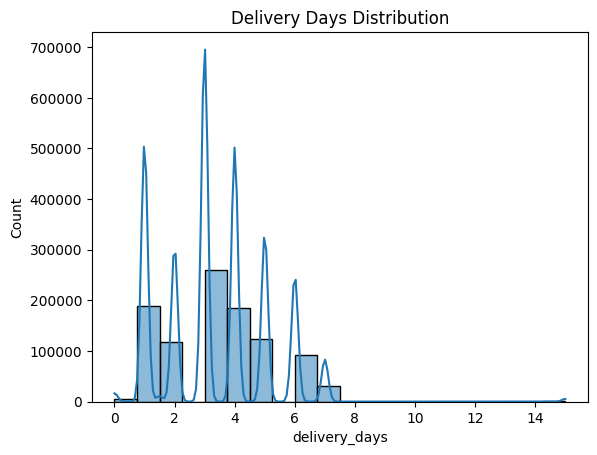

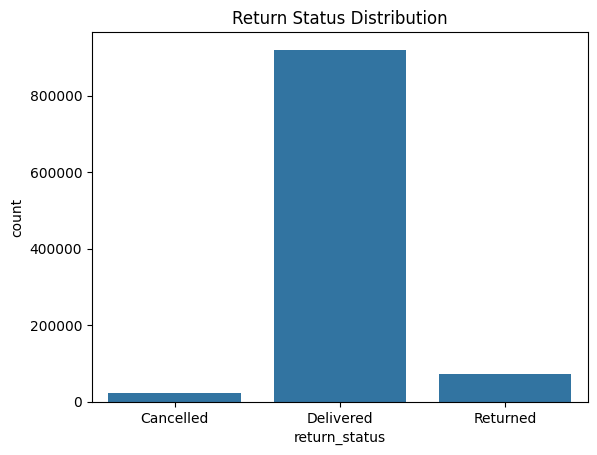

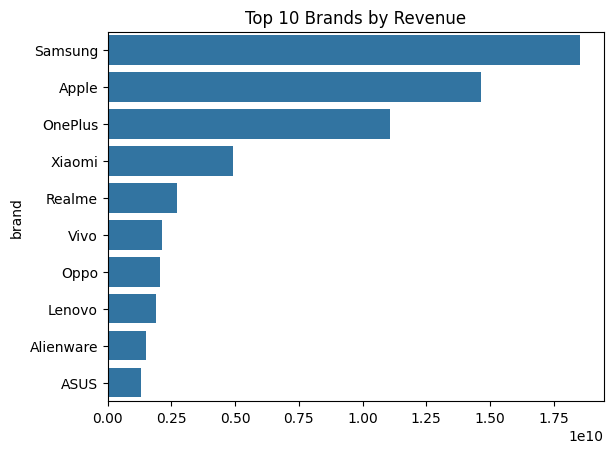

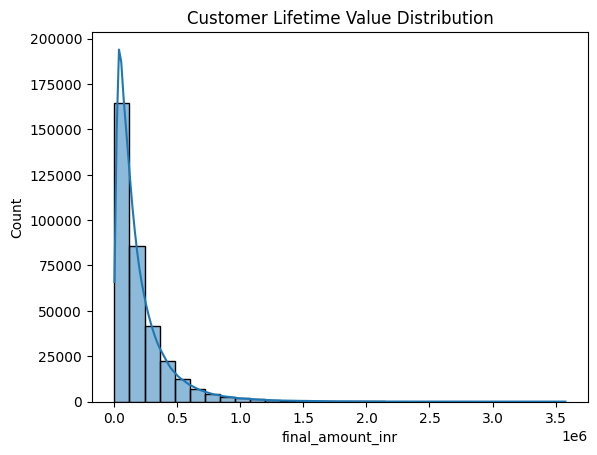

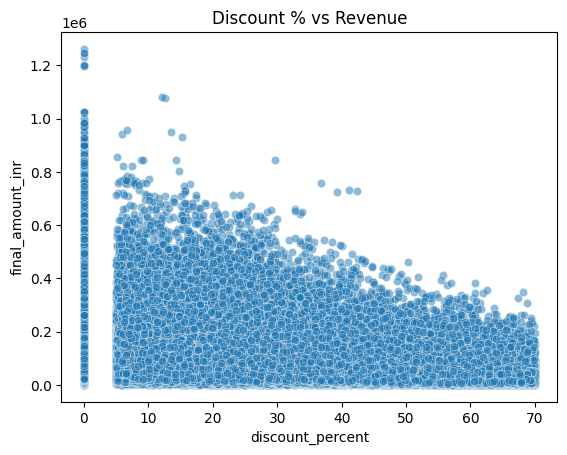

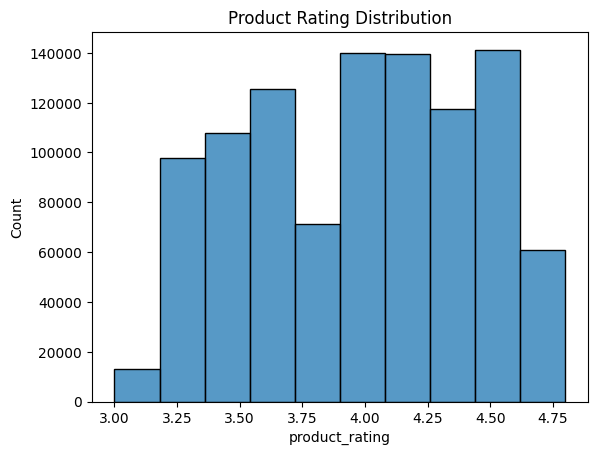

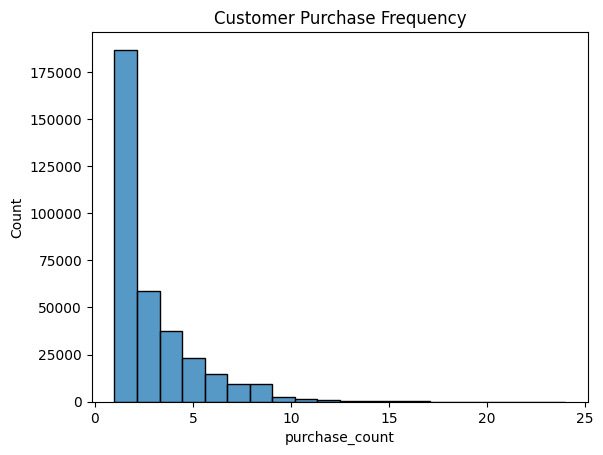

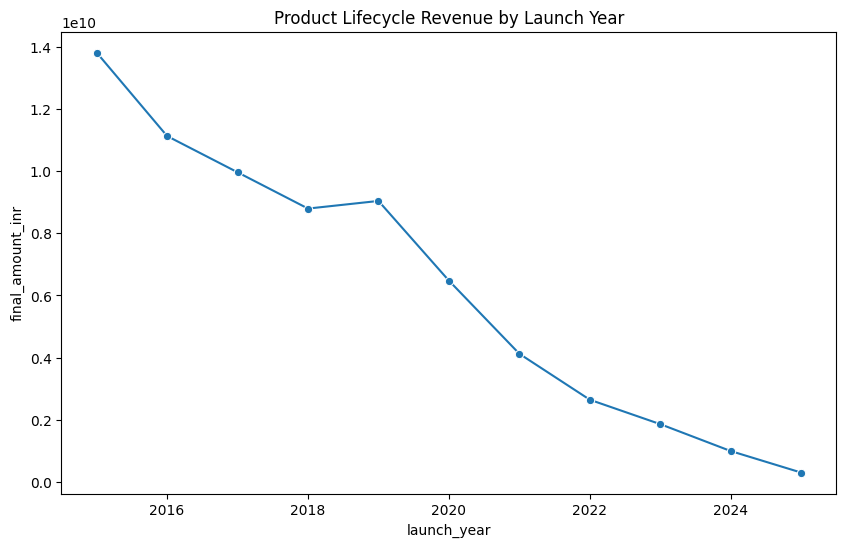

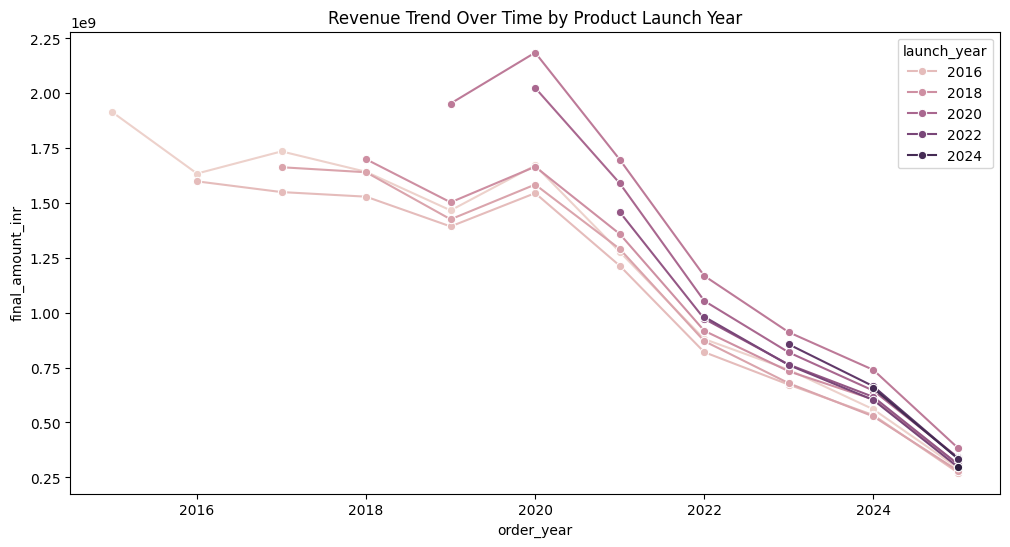

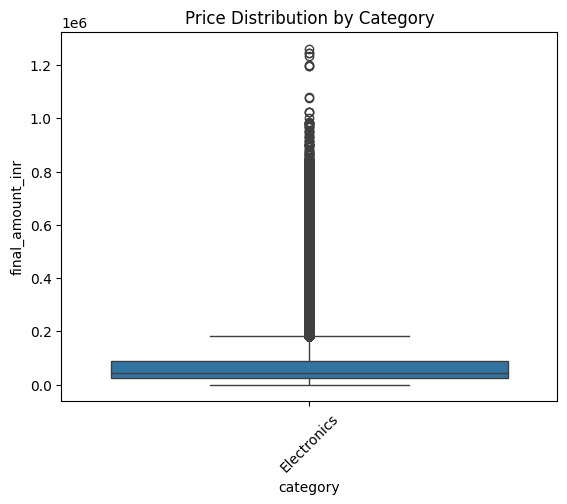

C:\Users\Sarath-VIN1820\AppData\Local\Temp\ipykernel_26948\2375183531.py:260: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_customers, x='order_year', y='customer_id', ax=axes[0,1], palette="Blues_d")


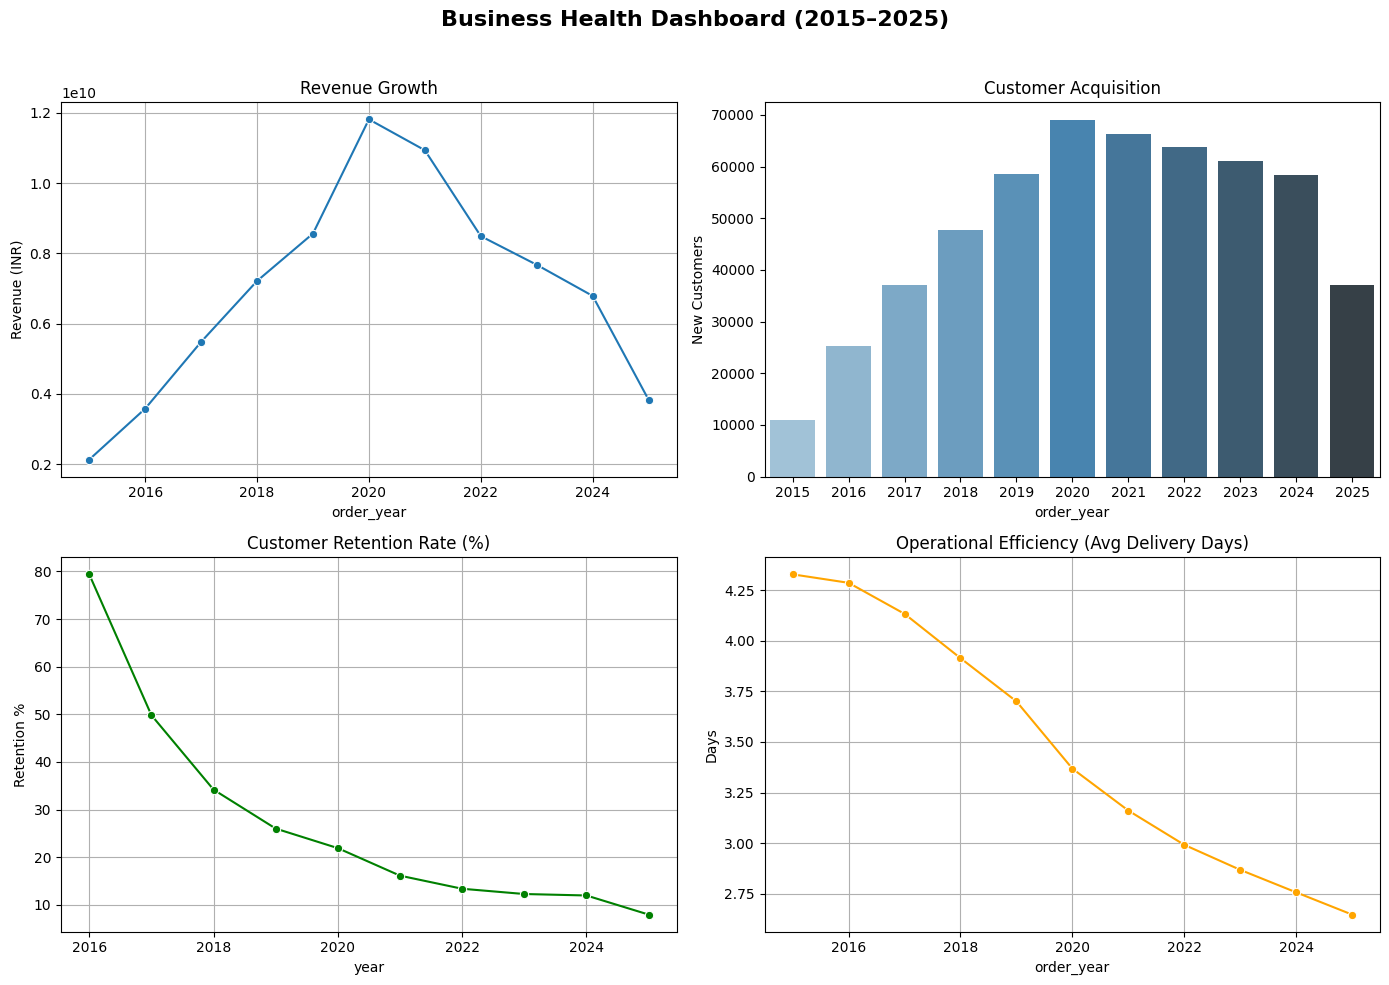

✅ Full EDA Analysis Completed with Business Health Dashboard.


In [17]:
# =========================================================
# 🛒 Amazon India: Full EDA Analysis (2015–2025)
# Includes Q20: Business Health Dashboard
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

# Step 1: Load Cleaned Transactions Dataset
transactions_path = r"D:\Data Science Projects\amazon_india_project\data\Cleaned-dataset\cleaned_amazon_india_2015_2025.csv"
df = pd.read_csv(transactions_path, parse_dates=['order_date'])

# Step 2: Prepare Time Columns (if not already present)
if 'order_year' not in df.columns:
 df['order_year'] = df['order_date'].dt.year
if 'order_month' not in df.columns:
 df['order_month'] = df['order_date'].dt.month
if 'order_quarter' not in df.columns:
 df['order_quarter'] = df['order_date'].dt.quarter

# Step 3: Ensure output folders exist
os.makedirs(r"D:\Data Science Projects\amazon_india_project\dashboard", exist_ok=True)
os.makedirs(r"D:\Data Science Projects\amazon_india_project\reports", exist_ok=True)

# =========================================================
# Q1: Revenue Trend Analysis
# =========================================================
yearly_revenue = df.groupby('order_year')['final_amount_inr'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_revenue, x='order_year', y='final_amount_inr', marker='o')
plt.title("Yearly Revenue Trend (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\revenue_trend.png")
plt.show()

# =========================================================
# Q2: Seasonal Patterns (Monthly Sales Heatmap)
# =========================================================
monthly_sales = df.groupby(['order_year', 'order_month'])['final_amount_inr'].sum().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(monthly_sales, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Monthly Sales Heatmap (2015–2025)")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\monthly_sales_heatmap.png")
plt.show()

# =========================================================
# Q3: RFM Customer Segmentation
# =========================================================
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df = df.dropna(subset=['order_date'])
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('customer_id').agg({
 'order_date': lambda x: (snapshot_date - x.max()).days,
 'transaction_id': 'count',
 'final_amount_inr': 'sum'
}).reset_index()
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
sns.scatterplot(data=rfm, x='Recency', y='Frequency', size='Monetary', hue='Monetary', palette='viridis')
plt.title("RFM Customer Segmentation")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\rfm_segmentation.png")
plt.show()

# =========================================================
# Q4: Payment Method Evolution
# =========================================================
payment_trend = df.groupby(['order_year','payment_method']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=payment_trend, x='order_year', y='count', hue='payment_method', marker='o')
plt.title("Payment Method Evolution (2015–2025)")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\payment_method_evolution.png")
plt.show()

# =========================================================
# Q5: Category Performance
# =========================================================
category_perf = df.groupby('category')['final_amount_inr'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=category_perf.values, y=category_perf.index)
plt.title("Category Performance by Revenue")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\category_performance.png")
plt.show()

# =========================================================
# Q6: Prime Membership Impact
# =========================================================
if 'is_prime_member' in df.columns:
 prime_stats = df.groupby('is_prime_member')['final_amount_inr'].mean().reset_index()
 sns.barplot(data=prime_stats, x='is_prime_member', y='final_amount_inr')
 plt.title("Average Order Value: Prime vs Non-Prime")
 plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\prime_vs_nonprime.png")
 plt.show()

# =========================================================
# Q7: Geographic Analysis
# =========================================================
city_perf = df.groupby('customer_city')['final_amount_inr'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_perf.values, y=city_perf.index)
plt.title("Top 10 Cities by Revenue")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\top_cities.png")
plt.show()

# =========================================================
# Q8: Festival Sales Impact
# =========================================================
if 'is_festival_sale' in df.columns:
 festival_sales = df.groupby('is_festival_sale')['final_amount_inr'].mean().reset_index()
 sns.barplot(data=festival_sales, x='is_festival_sale', y='final_amount_inr')
 plt.title("Average Order Value: Festival vs Non-Festival")
 plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\festival_sales_impact.png")
 plt.show()

# =========================================================
# Q9: Age Group Behavior
# =========================================================
if 'age_group' in df.columns:
 age_group_perf = df.groupby('age_group')['final_amount_inr'].mean().reset_index()
 sns.barplot(data=age_group_perf, x='age_group', y='final_amount_inr')
 plt.title("Average Spending by Age Group")
 plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\age_group_behavior.png")
 plt.show()

# =========================================================
# Q10: Price vs Demand
# =========================================================
sns.scatterplot(data=df, x='original_price_inr', y='final_amount_inr', alpha=0.5)
plt.title("Price vs Final Amount")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\price_vs_demand.png")
plt.show()

# =========================================================
# Q11: Delivery Performance
# =========================================================
sns.histplot(df['delivery_days'], bins=20, kde=True)
plt.title("Delivery Days Distribution")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\delivery_performance.png")
plt.show()

# =========================================================
# Q12: Return Patterns
# =========================================================
if 'return_status' in df.columns:
 return_rate = df.groupby('return_status').size().reset_index(name='count')
 sns.barplot(data=return_rate, x='return_status', y='count')
 plt.title("Return Status Distribution")
 plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\return_patterns.png")
 plt.show()

# =========================================================
# Q13: Brand Performance
# =========================================================
brand_perf = df.groupby('brand')['final_amount_inr'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=brand_perf.values, y=brand_perf.index)
plt.title("Top 10 Brands by Revenue")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\top_brands.png")
plt.show()

# =========================================================
# Q14: Customer Lifetime Value (CLV)
# =========================================================
clv = df.groupby('customer_id')['final_amount_inr'].sum().reset_index()
sns.histplot(clv['final_amount_inr'], bins=30, kde=True)
plt.title("Customer Lifetime Value Distribution")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\clv_distribution.png")
plt.show()

# =========================================================
# Q15: Discount Effectiveness
# =========================================================
sns.scatterplot(data=df, x='discount_percent', y='final_amount_inr', alpha=0.5)
plt.title("Discount % vs Revenue")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\discount_effectiveness.png")
plt.show()

# =========================================================
# Q16: Rating Patterns
# =========================================================
sns.histplot(df['product_rating'], bins=10, kde=False)
plt.title("Product Rating Distribution")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\rating_patterns.png")
plt.show()

# =========================================================
# Q17: Customer Journey
# =========================================================
cust_orders = df.groupby('customer_id')['order_date'].nunique().reset_index(name='purchase_count')
sns.histplot(cust_orders['purchase_count'], bins=20)
plt.title("Customer Purchase Frequency")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\customer_journey.png")
plt.show()

# =========================================================
# Q18: Inventory Lifecycle (Updated)
# =========================================================
products_path = r"D:\Data Science Projects\amazon_india_project\data\Dataset\amazon_india_products_catalog.csv"
products_df = pd.read_csv(products_path)
merged_df = df.merge(products_df[['product_id', 'launch_year']], on='product_id', how='left')

launch_perf = merged_df.groupby('launch_year')['final_amount_inr'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=launch_perf, x='launch_year', y='final_amount_inr', marker='o')
plt.title("Product Lifecycle Revenue by Launch Year")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\inventory_lifecycle.png")
plt.show()

launch_year_perf = merged_df.groupby(['launch_year', 'order_year'])['final_amount_inr'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=launch_year_perf, x='order_year', y='final_amount_inr', hue='launch_year', marker='o')
plt.title("Revenue Trend Over Time by Product Launch Year")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\inventory_lifecycle_trend.png")
plt.show()

# =========================================================
# Q19: Competitive Pricing
# =========================================================
sns.boxplot(data=df, x='category', y='final_amount_inr')
plt.xticks(rotation=45)
plt.title("Price Distribution by Category")
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\competitive_pricing.png")
plt.show()

# =========================================================
# Q20: Business Health Dashboard (Integrated)
# =========================================================
# Revenue Growth
yearly_revenue['growth_rate'] = yearly_revenue['final_amount_inr'].pct_change() * 100

# Customer Acquisition
yearly_customers = df.groupby('order_year')['customer_id'].nunique().reset_index()

# Retention Rates
years = sorted(df['order_year'].unique())
retention_data = []
for i in range(len(years)-1):
 current_year_customers = set(df[df['order_year'] == years[i]]['customer_id'])
 next_year_customers = set(df[df['order_year'] == years[i+1]]['customer_id'])
 retained = len(current_year_customers & next_year_customers)
 retention_rate = retained / len(current_year_customers) * 100
 retention_data.append({'year': years[i+1], 'retention_rate': retention_rate})
retention_df = pd.DataFrame(retention_data)

# Operational Efficiency
operational_eff = df.groupby('order_year')['delivery_days'].mean().reset_index()

# Multi-panel dashboard
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Business Health Dashboard (2015–2025)", fontsize=16, fontweight='bold')

sns.lineplot(data=yearly_revenue, x='order_year', y='final_amount_inr', marker='o', ax=axes[0,0])
axes[0,0].set_title("Revenue Growth")
axes[0,0].set_ylabel("Revenue (INR)")
axes[0,0].grid(True)

sns.barplot(data=yearly_customers, x='order_year', y='customer_id', ax=axes[0,1], palette="Blues_d")
axes[0,1].set_title("Customer Acquisition")
axes[0,1].set_ylabel("New Customers")

sns.lineplot(data=retention_df, x='year', y='retention_rate', marker='o', ax=axes[1,0], color="green")
axes[1,0].set_title("Customer Retention Rate (%)")
axes[1,0].set_ylabel("Retention %")
axes[1,0].grid(True)

sns.lineplot(data=operational_eff, x='order_year', y='delivery_days', marker='o', ax=axes[1,1], color="orange")
axes[1,1].set_title("Operational Efficiency (Avg Delivery Days)")
axes[1,1].set_ylabel("Days")
axes[1,1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(r"D:\Data Science Projects\amazon_india_project\dashboard\business_health_dashboard.png")
plt.show()

# Executive Summary
insights = f"""
## Executive Summary: Business Health (2015–2025)

1. **Revenue Growth**: Revenue grew from ₹{yearly_revenue['final_amount_inr'].iloc[0]:,.0f} in 2015 
to ₹{yearly_revenue['final_amount_inr'].iloc[-1]:,.0f} in 2025, with an average annual growth rate of 
{yearly_revenue['growth_rate'].mean():.2f}%.

2. **Customer Acquisition**: The customer base expanded steadily, reaching {yearly_customers['customer_id'].iloc[-1]:,} 
unique customers in 2025.

3. **Retention Rates**: Average retention rate across years is {retention_df['retention_rate'].mean():.2f}%, 
with highest retention in {retention_df.loc[retention_df['retention_rate'].idxmax(), 'year']}.

4. **Operational Efficiency**: Average delivery days reduced from {operational_eff['delivery_days'].iloc[0]:.1f} days 
in 2015 to {operational_eff['delivery_days'].iloc[-1]:.1f} days in 2025, indicating improved logistics performance.
"""
with open(r"D:\Data Science Projects\amazon_india_project\reports\business_health_insights.md", "w", encoding="utf-8") as f:
 f.write(insights)

print("✅ Full EDA Analysis Completed with Business Health Dashboard.")